Open the notebook via the cmd line. Having lots of issues with running altair but seems to run ok when opening through the cmd line rather than anaconda... for whatever reason.

In [1]:
import pandas as pd
#Download the data from Github repo 
hpi_url = "https://raw.githubusercontent.com/TrainingByPackt/Interactive-Data-Visualization-with-Python/master/datasets/hpi_data_countries.tsv"
hpi_df = pd.read_csv(hpi_url, sep='\t')
hpi_df.head()

,HPI Rank,Country,Region,Life Expectancy (years),Wellbeing (0-10),Inequality of outcomes,Ecological Footprint (gha/capita),Happy Planet Index
0,1,Costa Rica,Americas,79.1,7.3,15%,2.8,44.7
1,2,Mexico,Americas,76.4,7.3,19%,2.9,40.7
2,3,Colombia,Americas,73.7,6.4,24%,1.9,40.7
3,4,Vanuatu,Asia Pacific,71.3,6.5,22%,1.9,40.6
4,5,Vietnam,Asia Pacific,75.5,5.5,19%,1.7,40.3


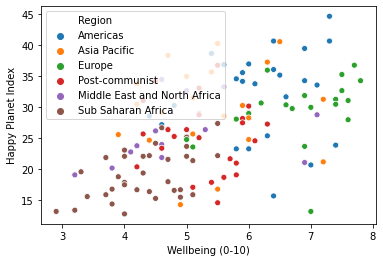

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax = sns.scatterplot(x='Wellbeing (0-10)', y='Happy Planet Index', hue='Region', data=hpi_df)
plt.show()

In [3]:
import altair as alt

In [4]:
alt.__version__

'4.1.0'

In [5]:
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

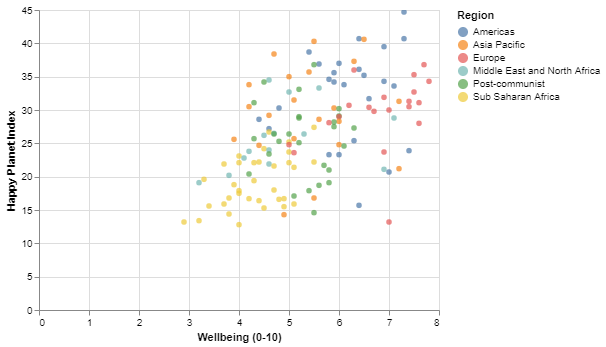

In [7]:
#.interactive() adds a zoom feature - use the mouse wheel!
alt.Chart(hpi_df).mark_circle().encode(
    x='Wellbeing (0-10):Q',
    y='Happy Planet Index:Q',
    color='Region:N',
).interactive()

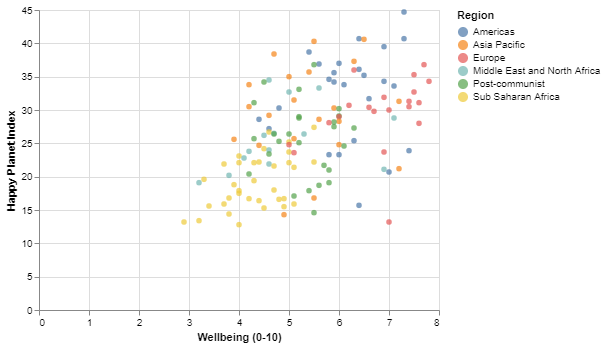

In [9]:
# hover and tooltip in altair
alt.Chart(hpi_df).mark_circle().encode(
    x='Wellbeing (0-10):Q',
    y='Happy Planet Index:Q',
    color='Region:N',
    tooltip=['Country', 'Region', 'Wellbeing (0-10)', 'Happy Planet Index', 'Life Expectancy (years)'],
)

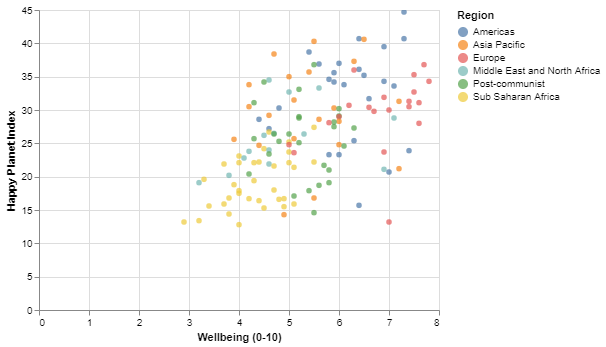

In [10]:
# zoom feature
import altair as alt
alt.Chart(hpi_df).mark_circle().encode(
    x='Wellbeing (0-10):Q',
    y='Happy Planet Index:Q',
    color='Region:N',
    tooltip=['Country', 'Region', 'Wellbeing (0-10)', 'Happy Planet Index', 'Life Expectancy (years)'],
).interactive()

In [11]:
#adding a select and highlight feature
selected_area = alt.selection_interval()

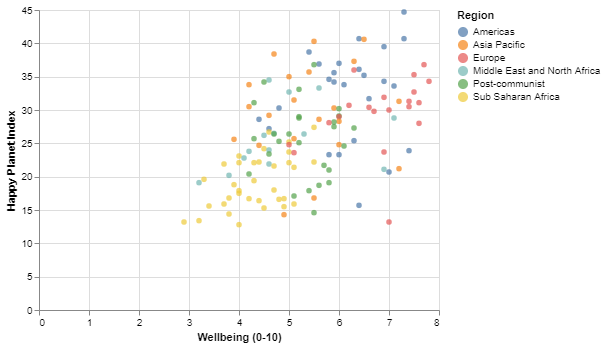

In [12]:
#try clicking and dragging to highlight a space in the plot
alt.Chart(hpi_df).mark_circle().encode(
    x='Wellbeing (0-10):Q',
    y='Happy Planet Index:Q',
    color='Region:N'
).add_selection(
    selected_area
)

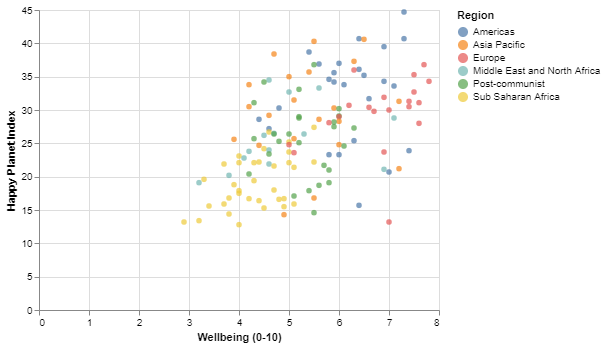

In [13]:
#add a feature to gray out all the dots in the non highlighted area
selected_area = alt.selection_interval()
alt.Chart(hpi_df).mark_circle().encode(
    x='Wellbeing (0-10):Q',
    y='Happy Planet Index:Q',
    color=alt.condition(selected_area, 'Region:N', alt.value('lightgray'))
).add_selection(
    selected_area
)

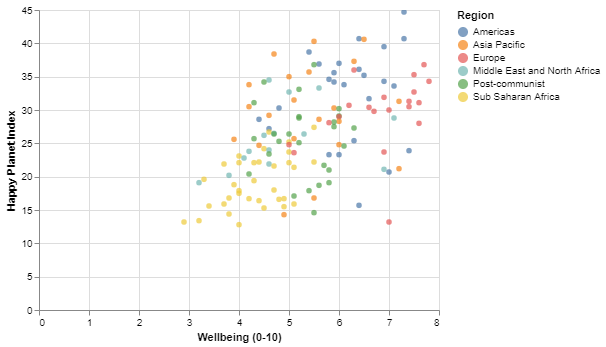

In [14]:
#put it all together - hover, selection tool, zoom
selected_area = alt.selection_interval()
alt.Chart(hpi_df).mark_circle().encode(
    x='Wellbeing (0-10):Q',
    y='Happy Planet Index:Q',
    color=alt.condition(selected_area, 'Region:N', alt.value('lightgray')),
    tooltip= ['Country', 'Region', 'Wellbeing (0-10)', 'Happy Planet Index', 'Life Expectancy (years)']
).interactive().add_selection(
    selected_area
)

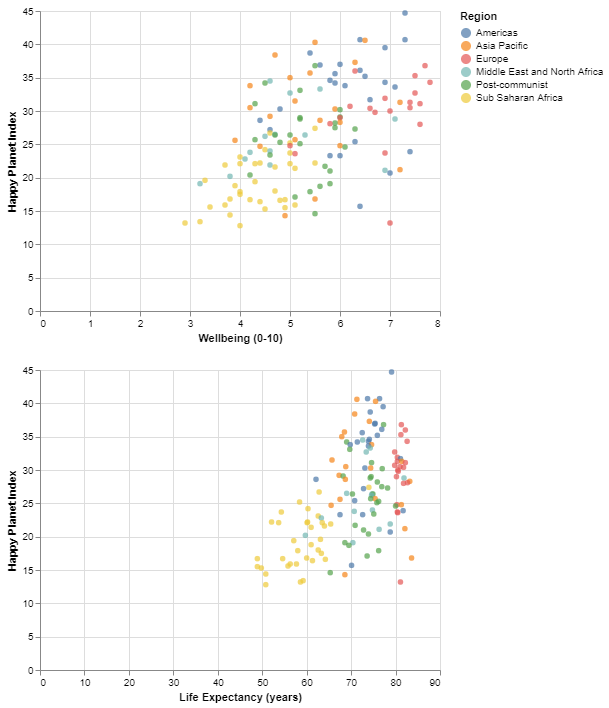

In [15]:
# subplotting altair charts
chart = alt.Chart(hpi_df).mark_circle().encode(
    y='Happy Planet Index',
    color='Region:N'
)
chart1 = chart.encode(x='Wellbeing (0-10)')
chart2 = chart.encode(x='Life Expectancy (years)')
alt.vconcat(chart1, chart2)

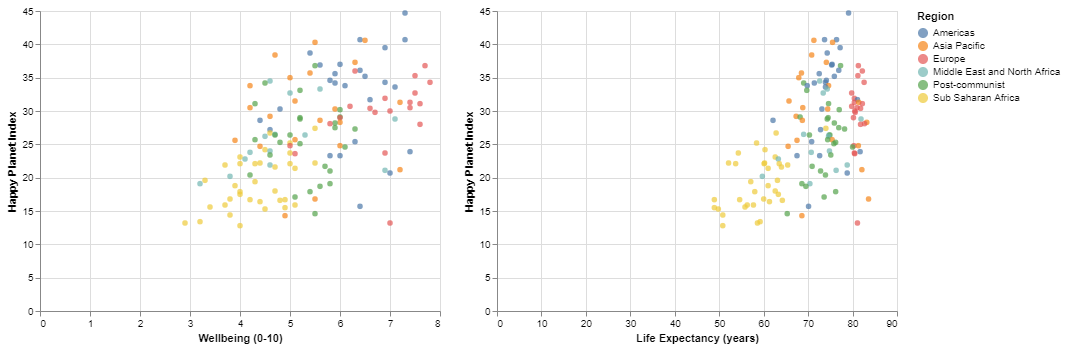

In [16]:
#subplotting horizontally, use hconcat
chart = alt.Chart(hpi_df).mark_circle().encode(
    y='Happy Planet Index',
    color='Region:N'
)
chart1 = chart.encode(x='Wellbeing (0-10)')
chart2 = chart.encode(x='Life Expectancy (years)')
alt.hconcat(chart1, chart2)

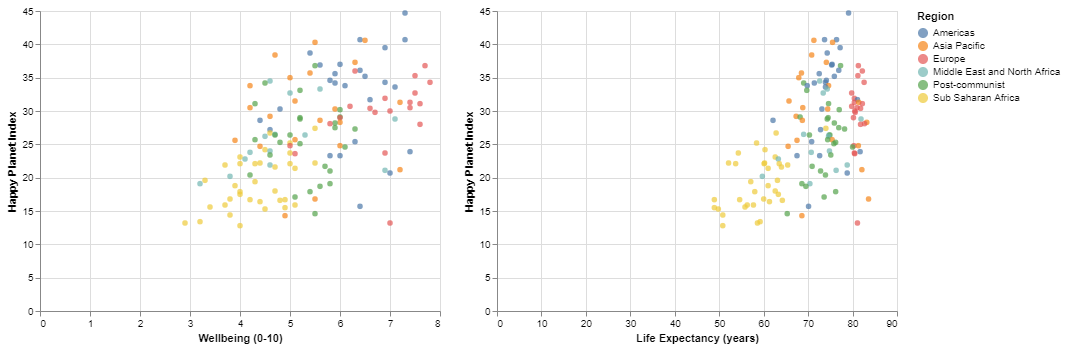

In [17]:
# adding interactivity with hover and tooltip to altair subplots
selected_area = alt.selection_interval()
chart = alt.Chart(hpi_df).mark_circle().encode(
    y='Happy Planet Index',
    color=alt.condition(selected_area, 'Region', alt.value('lightgray'))
).add_selection(
    selected_area
)
chart1 = chart.encode(x='Wellbeing (0-10)')
chart2 = chart.encode(x='Life Expectancy (years)')
chart1 | chart2

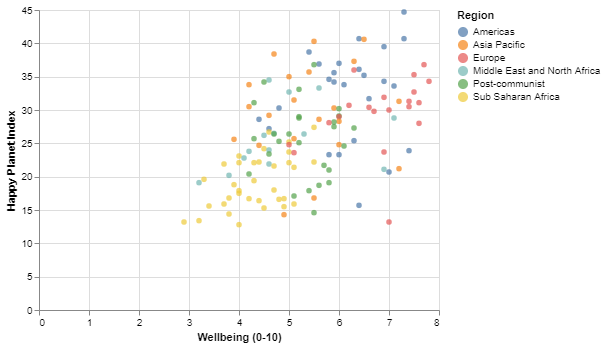

In [18]:
#add a dropdown selection menu with alt.binding_select
input_dropdown = alt.binding_select(options=list(set(hpi_df.Region)))
selected_points = alt.selection_single(fields=['Region'], bind=input_dropdown, name='Select')
color = alt.condition(selected_points,
                    alt.Color('Region:N'),
                    alt.value('lightgray'))
alt.Chart(hpi_df).mark_circle().encode(
    x='Wellbeing (0-10):Q',
    y='Happy Planet Index:Q',
    color=color,
    tooltip='Region:N'
).add_selection(
    selected_points
)

## Bar Charts

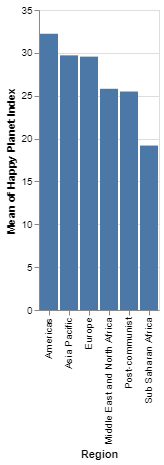

In [19]:
alt.Chart(hpi_df).mark_bar().encode(
    x='Region:N',
    y='mean(Happy Planet Index):Q',
)

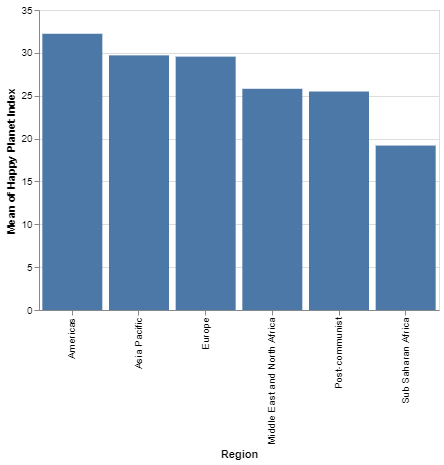

In [20]:
#adjust the width of the bars
alt.Chart(hpi_df).mark_bar().encode(
    x='Region:N',
    y='mean(Happy Planet Index):Q',
).properties(width=400)

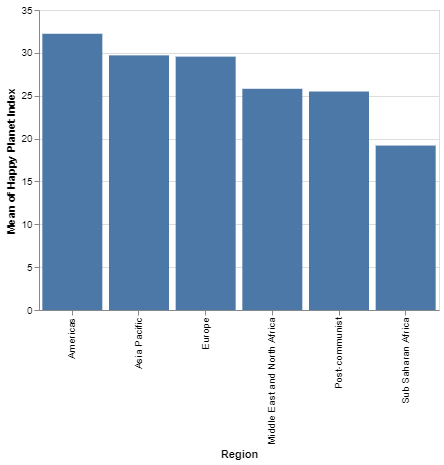

In [22]:
#add the zoom feature
alt.Chart(hpi_df).mark_bar().encode(
    x='Region:N',
    y='mean(Happy Planet Index):Q',
).properties(width=400).interactive()

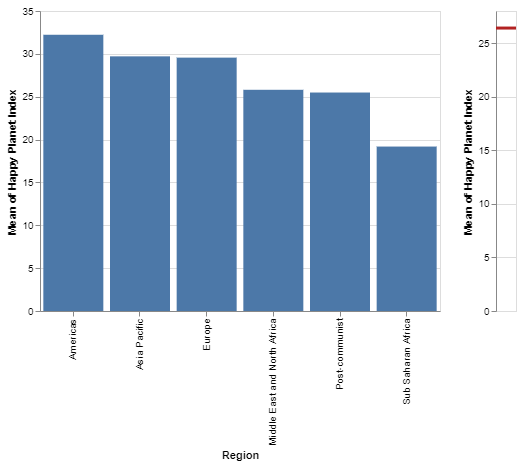

In [23]:
#add a line showing the mean HPI across all regions
bars = alt.Chart(hpi_df).mark_bar().encode(
    x='Region:N',
    y='mean(Happy Planet Index):Q',
).properties(width=400)
line = alt.Chart(hpi_df).mark_rule(color='firebrick').encode(
    y='mean(Happy Planet Index):Q',
    size=alt.SizeValue(3)
)
bars | line

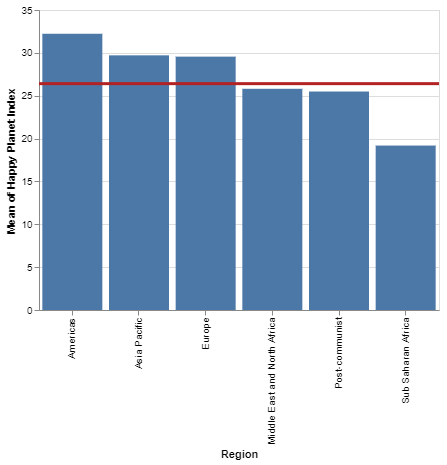

In [24]:
#put the mean line on the bar chart
bars = alt.Chart().mark_bar().encode(
    x='Region:N',
    y='mean(Happy Planet Index):Q',
).properties(width=400)
line = alt.Chart().mark_rule(color='firebrick').encode(
    y='mean(Happy Planet Index):Q',
    size=alt.SizeValue(3)
)
alt.layer(bars, line, data=hpi_df)

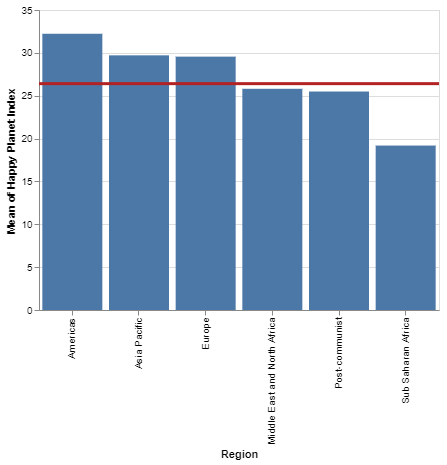

In [25]:
#add a selection feature
selected_bars = alt.selection(type='interval', encodings=['x'])
bars = alt.Chart(hpi_df).mark_bar().encode(
    x='Region:N',
    y='mean(Happy Planet Index):Q',
    opacity=alt.condition(selected_bars, alt.OpacityValue(1), alt.OpacityValue(0.7)),
).properties(width=400).add_selection(
    selected_bars
)
line = alt.Chart(hpi_df).mark_rule(color='firebrick').encode(
    y='mean(Happy Planet Index):Q',
    size=alt.SizeValue(3)
).transform_filter(
    selected_bars
)
bars + line

## Heatmaps

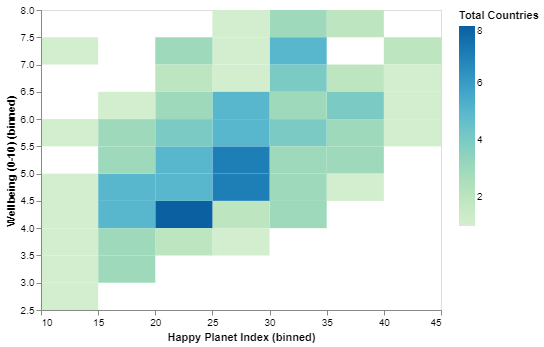

In [26]:
#build a heatmap with mark_rect()
alt.Chart(hpi_df).mark_rect().encode(
    alt.X('Happy Planet Index:Q', bin=True),
    alt.Y('Wellbeing (0-10):Q', bin=True),
    alt.Color('count()',
        scale=alt.Scale(scheme='greenblue'),
        legend=alt.Legend(title='Total Countries')
    )
)

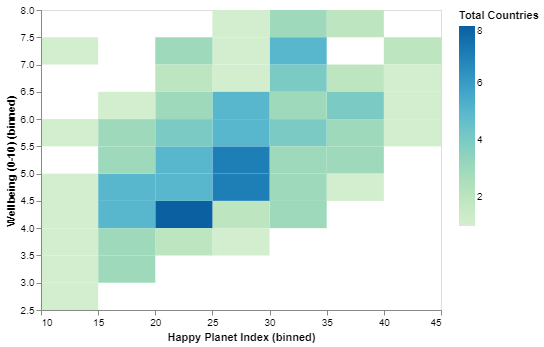

In [27]:
#add a zoom feature
alt.Chart(hpi_df).mark_rect().encode(
    alt.X('Happy Planet Index:Q', bin=True),
    alt.Y('Wellbeing (0-10):Q', bin=True),
    alt.Color('count()',
        scale=alt.Scale(scheme='greenblue'),
        legend=alt.Legend(title='Total Countries')
    )
).interactive()

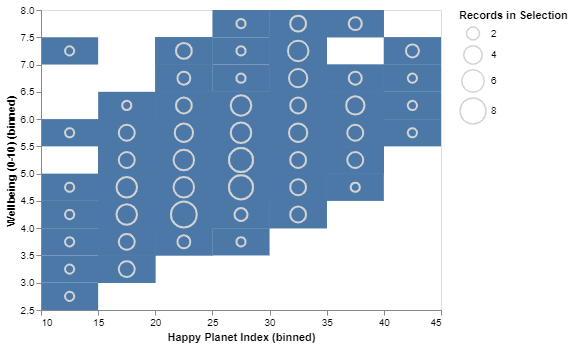

In [28]:
#draw circles on the heatmap with mark_point to reflect wellbeing
heatmap = alt.Chart(hpi_df).mark_rect().encode(
    alt.X('Happy Planet Index:Q', bin=True),
    alt.Y('Wellbeing (0-10):Q', bin=True)
)
circles = heatmap.mark_point().encode(
    alt.ColorValue('lightgray'),
    alt.Size('count()',
        legend=alt.Legend(title='Records in Selection')
    )
)
heatmap + circles

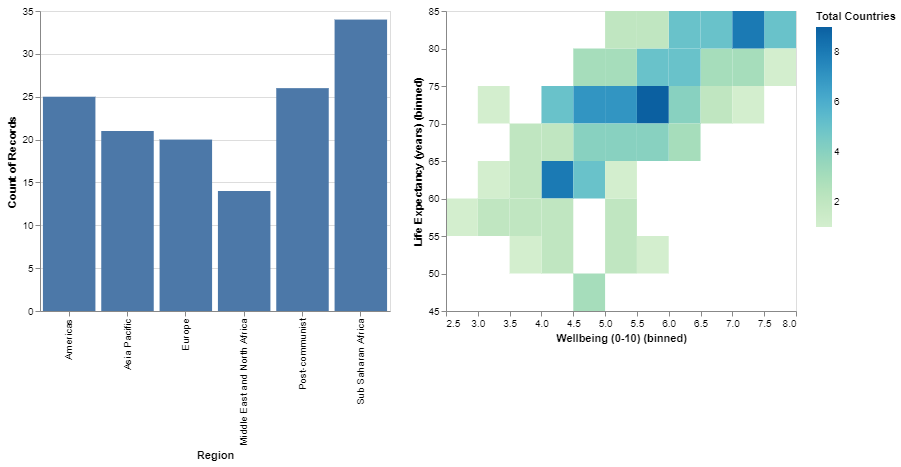

In [29]:
#plot a heatmap and bar chart side by side horizontally
bars = alt.Chart(hpi_df).mark_bar().encode(
    x='Region:N',
    y='count():Q',
).properties(width=350)
heatmap = alt.Chart(hpi_df).mark_rect().encode(
    alt.X('Wellbeing (0-10):Q', bin=True),
    alt.Y('Life Expectancy (years):Q', bin=True),
    alt.Color('count()',
        scale=alt.Scale(scheme='greenblue'),
        legend=alt.Legend(title='Total Countries')
    )
).properties(width=350)
bars | heatmap

In [30]:
#build the heatmap as before
selected_region = alt.selection(type="single", encodings=['x'])
heatmap = alt.Chart(hpi_df).mark_rect().encode(
    alt.X('Wellbeing (0-10):Q', bin=True),
    alt.Y('Life Expectancy (years):Q', bin=True),
    alt.Color('count()',
        scale=alt.Scale(scheme='greenblue'),
        legend=alt.Legend(title='Total Countries')
    )
).properties(
    width=350
)

In [31]:
#add circles as before
circles = heatmap.mark_point().encode(
    alt.ColorValue('grey'),
    alt.Size('count()',
        legend=alt.Legend(title='Records in Selection')
    )
).transform_filter(
    selected_region
)

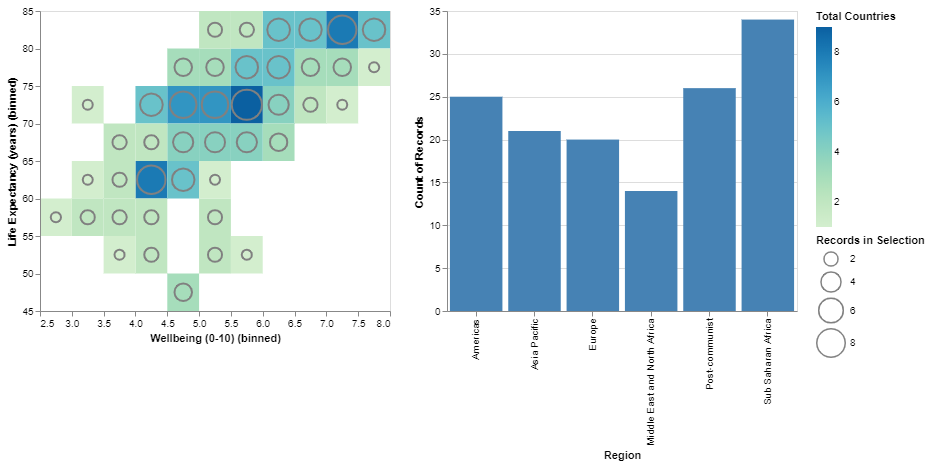

In [32]:
#add bar chart and dynamically link the heatmap and bar chart
bars = alt.Chart(hpi_df).mark_bar().encode(
    x='Region:N',
    y='count()',
    color=alt.condition(selected_region, alt.ColorValue("steelblue"), alt.ColorValue("grey"))
).properties(
    width=350
).add_selection(selected_region)
heatmap + circles | bars